## LIME on images
This notebook demonstrates the use of LIME on the [leafsnap30 image dataset](https://zenodo.org/record/5061353#.YeUwXy1Q30o).

## Introduction

A convolutional neural network was trained to identify the species of a leaf based on a picture of it.  
Here LIME is used to then determine which pixels of the image were most important to determine the species.

In [1]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import dianna

In [2]:
# define paths and model classes
true_species = 'acer_rubrum'
image_path = f'data/leafsnap_example_{true_species}.jpg'
model_path = str(Path('~/surfdrive/Shared/datasets/leafsnap/leafsnap_model.onnx').expanduser())
model_classes_path = 'data/leafsnap_classes.csv'

In [7]:
# load the model class definitions
class_to_idx = dict(np.genfromtxt(model_classes_path, dtype=None, encoding=None, delimiter=','))
true_species = 'acer_rubrum'
true_species_index = class_to_idx[true_species]

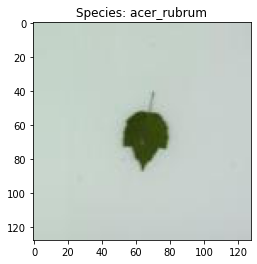

In [36]:
# load the example image
img = np.array(Image.open(f'data/leafsnap_example_{true_species}.jpg'))

plt.imshow(img)
plt.title(f'Species: {true_species}');

# the model expects float32 values in the 0-1 range for each pixel, with the color channels as first axis
# the .jpg file has 0-255 ints with the channel axis last so it needs to be changed
input_data = img.transpose(2, 0, 1).astype(np.float32) / 255.

# Add a first axis to the image, which will be used as batch axis for the model
input_data = input_data[None, ...]

# define axis labels. Required are batch and channels
# in this example image, the batch axis is the first axis and the channels axis is the second axis
axis_labels = {0: 'batch', 1: 'channels'}

## Running DIANNA

In [9]:
explanation = dianna.explain_image(model_path, input_data, 'LIME', axes_labels=axis_labels, label=true_species_index)
explanation.shape

TypeError: __init__() got an unexpected keyword argument 'label'

In [ ]:
## Using advanced interface until we can select label from top-level interface

In [27]:
from dianna.methods import LIME
lime = LIME(axes_labels=axis_labels)
heatmap = lime.explain_image(model_path, input_data, label=true_species_index,
                                 hide_color=.5, distance_metric='euclidean',
                                 num_samples=1000)
heatmap.shape

  0%|          | 0/1000 [00:00<?, ?it/s]

(128, 128)

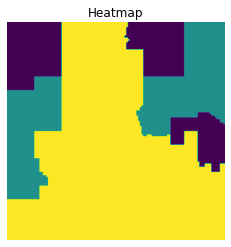

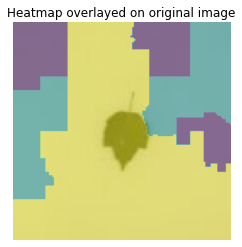

In [47]:
from dianna.visualization import plot_image

plot_image(heatmap, show_plot=False)
plt.title('Heatmap')
plt.axis('off')

plot_image(heatmap, original_data=img, show_plot=False)
plt.title('Heatmap overlayed on original image')
plt.axis('off')

plt.show()